In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read Data for shopping mall
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#NOTE!!! This data is Fictitious

#Creating a variable X (array) to hold the values for the Anual income and the Spending Sore of the customers


In [6]:
#we want the column 3 and 4 for the analysis to segement users based on income and score
X = data.iloc[:, [3,4]].values

In [8]:
#To find out the optimal number of cluseters we use the Elbow method... Import the KMeans

from sklearn.cluster import KMeans

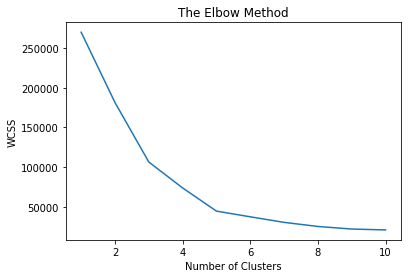

In [9]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [10]:
#Applying K-means to the mall dataset for K = 5 clusters

kmeans= KMeans(n_clusters = 5, init = 'k-means++', max_iter =300, n_init =10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

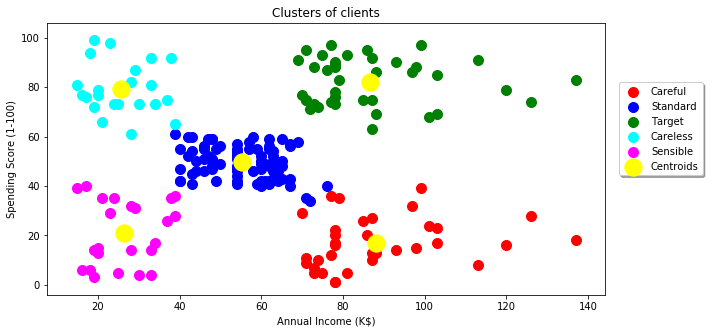

In [23]:
#Visualising the clusters

plt.figure(figsize=(10,5))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of clients')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 0.8), shadow=True, ncol=1)
plt.show()